# 1. Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Importacion de Librerias

In [ ]:
# Manejo de rutas y archivos
import os

# Calculo matricial para python
import numpy as np

# Graficar
import matplotlib.pyplot as plt

# Manejo de datos (datasets)
import pandas as pd

# Algoritmos de optimizacion de funciones matematicas
from scipy import optimize

#Para separar el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# 3. Preparamos los datos

Cargamos el dataset

In [ ]:
# Cargar datos
file_path = '/content/drive/MyDrive/IA 1/datasets/heart_disease_dataset.csv'
# Cargar el archivo CSV usando pandas
data = pd.read_csv(file_path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,0
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,52,0,1,169,479,0,0,124,0,3.7,2,3,3,0,0,27.8,0
3065,75,0,4,90,372,0,2,141,0,2.1,2,2,3,0,1,37.0,1
3066,68,1,4,166,564,0,1,76,0,4.5,3,1,3,0,0,16.1,0
3067,66,0,3,143,113,1,1,207,0,3.6,1,0,6,0,0,27.7,0


Preparamos el DATASET

In [ ]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15

Dividimos el data set: 20 % para pruebas y 80 % para entrenamiento

In [ ]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :16]  # Selecciona las columnas de la 0 a la 13 (14 columnas en total)
y_test = test_data.iloc[:, 16]   # Selecciona la columna 14 (la 15ª columna)

# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, :16]
y_train = train_data.iloc[:, 16]

m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el test son: {:.0f}".format(len(test_data)))

Datos de X_train:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2329   75    1   3       130   161    0        2       93      0      5.5   
2282   38    1   2       119   373    1        1       64      0      0.8   
1377   65    1   2       194   506    0        0       82      0      5.6   
351    65    1   2       131   204    0        0      180      0      4.2   
2496   35    1   1       164   151    0        1      117      0      2.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1638   62    0   2        97   219    0        1      152      1      1.5   
1095   70    1   2       137   372    0        0      190      0      4.8   
1130   32    1   1       149   556    0        2      163      0      1.1   
1294   42    0   3       139   223    1        1      101      0      6.1   
860    33    0   4       172   442    0        2      207      0      4.8   

      slope  ca  thal  smoking  diabetes   bmi  
2329    

# 4. Implementacion de la regresión logística

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos los Datos

In [ ]:
X_norm, mu, sigma = featureNormalize(X_train)

Mostramos los datos normalizados

In [ ]:
X_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi
2329,1.643748,0.901746,0.443181,-0.497786,-1.266831,-0.413858,1.219557,-0.957865,-0.467939,1.273347,-0.027379,-0.703988,-0.875271,-0.727078,-0.494265,-1.470190
2282,-1.046326,0.901746,-0.449362,-0.845503,0.180583,2.416286,-0.010017,-1.625235,-0.467939,-1.337031,1.194718,-0.703988,1.407035,-0.727078,-0.494265,1.331552
1377,0.916701,0.901746,-0.449362,1.525291,1.088631,-0.413858,-1.239590,-1.211006,-0.467939,1.328887,1.194718,2.649747,-0.875271,-0.727078,-0.494265,-0.865893
351,0.916701,0.901746,-0.449362,-0.466176,-0.973252,-0.413858,-1.239590,1.044245,-0.467939,0.551327,-0.027379,0.413923,-0.875271,1.375368,-0.494265,0.356436
2496,-1.264440,0.901746,-1.341905,0.576974,-1.335105,-0.413858,-0.010017,-0.405559,-0.467939,-0.670552,1.194718,-0.703988,0.836458,1.375368,2.023206,-0.275330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.698587,-1.108959,-0.449362,-1.540936,-0.870840,-0.413858,-0.010017,0.399888,2.137029,-0.948251,-1.249475,-0.703988,1.407035,-0.727078,-0.494265,1.166744
1095,1.280224,0.901746,-0.449362,-0.276512,0.173756,-0.413858,-1.239590,1.274373,-0.467939,0.884567,1.194718,1.531835,1.407035,-0.727078,-0.494265,-0.920829
1130,-1.482554,0.901746,-1.341905,0.102815,1.430002,-0.413858,1.219557,0.653028,-0.467939,-1.170411,-1.249475,-0.703988,-0.875271,-0.727078,-0.494265,-0.385202
1294,-0.755507,-1.108959,0.443181,-0.213291,-0.843531,2.416286,-0.010017,-0.773763,-0.467939,1.606587,1.194718,0.413923,-0.875271,1.375368,-0.494265,0.383904


In [ ]:
# Obtener las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 2455
n (número de columnas): 16


Agregamos una columna de unos

In [ ]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
X_ready

array([[ 1.        ,  1.64374791,  0.90174621, ..., -0.72707812,
        -0.49426513, -1.47019011],
       [ 1.        , -1.04632562,  0.90174621, ..., -0.72707812,
        -0.49426513,  1.33155194],
       [ 1.        ,  0.91670101,  0.90174621, ..., -0.72707812,
        -0.49426513, -0.86589281],
       ...,
       [ 1.        , -1.48255376,  0.90174621, ..., -0.72707812,
        -0.49426513, -0.38520177],
       [ 1.        , -0.75550686, -1.10895947, ...,  1.37536803,
        -0.49426513,  0.38390389],
       [ 1.        , -1.40984907, -1.10895947, ..., -0.72707812,
         2.02320562,  1.40022208]])

Definimos la función Sigmoidea

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con z=0, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de z.

In [ ]:
# Prueba la implementacion de la funcion sigmoid
print(sigmoid(0))

0.5


In [ ]:
# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [ ]:

def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [ ]:
from matplotlib import pyplot

theta calculado por el descenso por el gradiente: [-0.39395463 -0.02768233  0.00544013 -0.00190786 -0.03674555 -0.00488008
  0.01980895 -0.03375612 -0.00058816 -0.0072264  -0.08713049 -0.04240552
  0.05167283 -0.04055732 -0.03054976 -0.03675711  0.03514963]


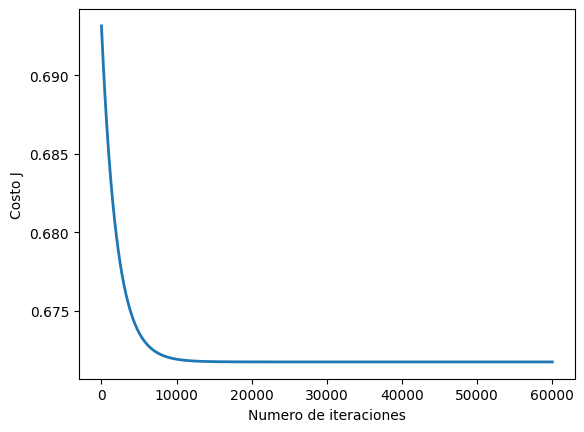

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 60000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(17)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
print(f"Con un costo de: { J_history[-1]} ")

Con un costo de: 0.6717615077946583 


# 5. TEST de validación

Haremos las pruebas del rendimiento del modelo con el 20% de los datos

In [ ]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi
2651,0.262359,0.901746,-0.449362,-1.414493,0.993047,-0.413858,-1.239590,1.435462,-0.467939,0.884567,1.194718,-0.703988,-0.875271,1.375368,-0.494265,-0.467606
1740,0.335063,0.901746,0.443181,0.766637,1.313936,2.416286,-0.010017,0.468926,-0.467939,-1.114871,-0.027379,-0.703988,0.836458,-0.727078,-0.494265,1.001935
2606,-0.101165,0.901746,1.335724,0.071204,0.166928,-0.413858,1.219557,0.192773,-0.467939,-1.225951,1.194718,-0.703988,-0.875271,-0.727078,2.023206,1.633701
1455,0.916701,-1.108959,-0.449362,0.924690,0.965737,-0.413858,-0.010017,-0.175431,-0.467939,-1.003791,-0.027379,0.413923,-0.875271,1.375368,-0.494265,1.139276
2164,-0.828212,0.901746,-1.341905,-1.129998,1.675790,-0.413858,1.219557,0.123735,-0.467939,1.551047,-1.249475,-0.703988,-0.875271,-0.727078,2.023206,0.315234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,-0.101165,-1.108959,0.443181,-0.276512,1.730409,-0.413858,-0.010017,1.481487,-0.467939,0.606867,1.194718,-0.703988,0.836458,1.375368,-0.494265,-0.014383
2285,0.480473,0.901746,0.443181,0.829858,-0.072031,-0.413858,-1.239590,1.067258,2.137029,-0.448392,1.194718,1.531835,0.836458,-0.727078,-0.494265,1.125541
219,0.553178,0.901746,-0.449362,1.462070,-1.089318,-0.413858,1.219557,1.550526,-0.467939,-0.670552,1.194718,0.413923,1.407035,1.375368,-0.494265,1.290350
367,-1.555258,0.901746,-0.449362,-0.813892,-1.492136,-0.413858,-0.010017,-0.612674,-0.467939,0.495787,-0.027379,0.413923,0.836458,-0.727078,-0.494265,1.482626


Concatenamos con una columna de unos a la izquierda

In [ ]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.          0.2623588   0.90174621 ...  1.37536803 -0.49426513
  -0.46760595]
 [ 1.          0.33506349  0.90174621 ... -0.72707812 -0.49426513
   1.00193522]
 [ 1.         -0.10116465  0.90174621 ... -0.72707812  2.02320562
   1.63370059]
 ...
 [ 1.          0.55317756  0.90174621 ...  1.37536803 -0.49426513
   1.29034985]
 [ 1.         -1.55525845  0.90174621 ... -0.72707812 -0.49426513
   1.48262626]
 [ 1.          1.28022446 -1.10895947 ...  1.37536803 -0.49426513
   1.09807343]]


In [ ]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [ ]:
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha*100, columns = ['Probabilidad de cardiopatia %'])
df_pred['Probabilidad de cardiopatia %'] = df_pred['Probabilidad de cardiopatia %'].abs()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
X_columans = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal','smoking','diabetes','bmi']
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Valores del Y Reales'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(200)

,Valores del Y Reales,Probabilidad de cardiopatia %,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi
0,1,38.200641,56.0,1.0,2.0,101.0,492.0,0.0,0.0,197.0,0.0,4.8,3.0,0.0,3.0,1.0,0.0,24.1
1,1,43.073614,57.0,1.0,3.0,170.0,539.0,1.0,1.0,155.0,0.0,1.2,2.0,0.0,6.0,0.0,0.0,34.8
2,1,40.666247,51.0,1.0,4.0,148.0,371.0,0.0,2.0,143.0,0.0,1.0,3.0,0.0,3.0,0.0,1.0,39.4
3,0,42.412358,65.0,0.0,2.0,175.0,488.0,0.0,1.0,127.0,0.0,1.4,2.0,1.0,3.0,1.0,0.0,35.8
4,1,37.744985,41.0,1.0,1.0,110.0,592.0,0.0,2.0,140.0,0.0,6.0,1.0,0.0,3.0,0.0,1.0,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,39.148909,75.0,1.0,2.0,119.0,590.0,0.0,1.0,129.0,0.0,3.9,3.0,1.0,7.0,0.0,0.0,38.6
196,0,39.431204,31.0,1.0,3.0,160.0,211.0,0.0,2.0,128.0,0.0,4.9,2.0,1.0,6.0,0.0,0.0,33.4
197,0,42.604808,49.0,1.0,2.0,106.0,486.0,0.0,0.0,134.0,0.0,0.8,1.0,1.0,6.0,1.0,1.0,20.1
198,0,42.667281,56.0,1.0,2.0,135.0,469.0,0.0,1.0,70.0,0.0,4.0,2.0,2.0,6.0,0.0,0.0,37.2


Presición de nuestro modelo de regresion logaritmica

Usamos el metodo np.mean, la media (promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [ ]:
y_umbral = (y_predicha >= 0.5).astype(int)

In [ ]:
# Mostramos la precisión de entrenamiento
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test.values.ravel()) * 100))

Precisión de entrenamiento: 59.45 % 
